In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import activations
import numpy as np 

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [3]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8163 - loss: 5.4742
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9154 - loss: 0.3777
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9230 - loss: 0.3255
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9367 - loss: 0.2704


In [4]:
val_loss, val_acc = model.evaluate(x_test, y_test)

print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9326 - loss: 0.2774
0.23894132673740387 0.941100001335144


In [5]:
model.save('digit_classifier.keras')

In [6]:
custom_objects = {
    'softmax_v2': activations.softmax  
}

new_model = tf.keras.models.load_model('digit_classifier.keras', custom_objects=custom_objects)

In [8]:
prediction = new_model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.5371667e-13, 4.5606003e-18, 7.1515815e-09, ..., 9.9999952e-01,
        4.7707786e-14, 4.9006536e-07],
       [1.1250440e-05, 2.3201955e-02, 9.0261364e-01, ..., 1.7265817e-02,
        3.1845199e-04, 6.0336799e-05],
       [2.4794758e-11, 9.9998510e-01, 8.7522955e-07, ..., 5.1686385e-07,
        1.3019340e-05, 2.4300524e-08],
       ...,
       [3.4368122e-07, 4.9567579e-06, 2.3499586e-08, ..., 5.9422433e-07,
        1.4328374e-07, 2.1373306e-04],
       [1.8290485e-19, 4.1718756e-19, 1.3068759e-22, ..., 2.8171996e-16,
        4.7273658e-14, 2.0973378e-16],
       [5.7851068e-12, 1.6456718e-25, 1.4406513e-11, ..., 5.3417991e-14,
        2.4933367e-19, 1.9648070e-19]], dtype=float32)

7


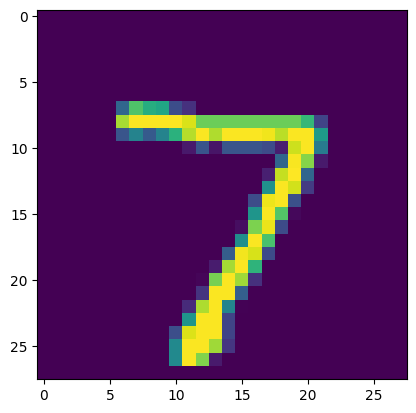

In [10]:
print(np.argmax(prediction[0]))

plt.imshow(x_test[0])
plt.show()